In [1]:
# Importo las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Ajuste de funcion poly
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Cargo los dataset a utilizar
dataset_general = pd.read_csv('data/fe/dataset_fe.csv')

In [3]:
dataset_general.head(2)

,Unnamed: 0,actos_coleg_esc,monto_cred_uva,superficie,precio_venta_m2,expectativa_inflacion_mediana,tasas_interes_pm,precio_alquiler_dolares,mes
0,0,3121.0,0.0,126882.0,2197.955607,30.0,17.14,386.997250,6
1,1,3044.0,0.0,103881.0,2156.769231,30.0,17.14,369.452667,5


In [4]:
# Columna no me aporta valor
dataset_general = dataset_general.drop('Unnamed: 0', 1)

In [5]:
# Defino las features y el target
X = dataset_general.drop(["actos_coleg_esc"], axis=1)
y = dataset_general['actos_coleg_esc']

In [6]:
# Divido la muestra para el entramiento del modelo
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40,random_state=47)

In [7]:
# Realizo el escalamiento

from sklearn.preprocessing import MinMaxScaler

# Genero la norm con el X_train
norm = MinMaxScaler().fit(X_train)

# Ajusto la X_train
X_train_norm = norm.transform(X_train)

# Ajusto por separado la X_test
X_test_norm = norm.transform(X_test)

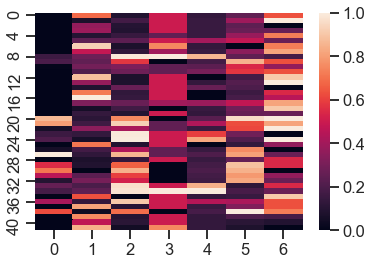

In [103]:
# Verificamos el escalamiento

import seaborn as sns

sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
sns.heatmap(X_train_norm)
plt.show()

In [104]:
# Voy a utilizar K-Folds o LOOCV para el entrenamiento:
# https://platzi.com/clases/1796-scikitlearn-ml/25666-validacion-de-nuestro-modelo-usando-cross-validati/

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [105]:
# Defino el modelo
model = DecisionTreeRegressor()

# Fiteo:
model.fit(X_train_norm, y_train)

DecisionTreeRegressor()

In [106]:
ypred2 = model.predict(X_test_norm)

In [107]:
np.sqrt(mean_squared_error(y_test, ypred2))

554.8302185611121

Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

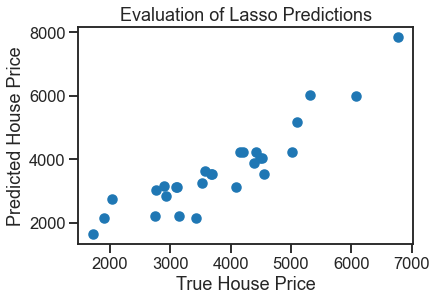

In [115]:
# let's evaluate our predictions respect to the real sale price
plt.scatter(y_test, model.predict(X_test_norm))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

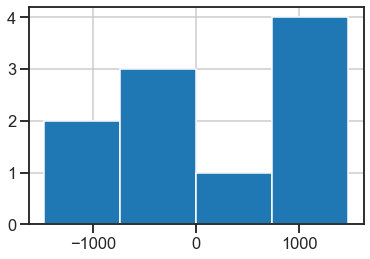

In [121]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

preds = pd.Series(model.predict(X_test_norm))

errors = y_test - preds
errors.hist(bins=4)
plt.show()